## Загрузка и первичная обработка данных

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv(r'C:\Users\Chekun\Downloads\Data для тестового - Data.csv')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Название рассылки       218 non-null    object
 1   Название кампании       218 non-null    object
 2   Направление             218 non-null    object
 3   Месяц                   218 non-null    object
 4   Дата                    218 non-null    object
 5   Год                     218 non-null    int64 
 6   Номер недели            218 non-null    int64 
 7   День недели             218 non-null    int64 
 8   День недели.1           218 non-null    object
 9   Время                   218 non-null    object
 10  Веб-версия              218 non-null    object
 11  Тема письма             218 non-null    object
 12  Сегмент                 218 non-null    object
 13  Отправлено              218 non-null    object
 14  Доставлено              218 non-null    object
 15  Открыт

In [170]:
# избавляемся от экселевских разделителей разрядов 
df = df.replace(r'(?<=\d)[\s\u00A0]+(?=\d)', '', regex=True)

In [171]:
# создадим новую категорию для более общего анализа кампаний
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y', errors='coerce')
df['Год_месяц'] = pd.to_datetime(df['Дата']).dt.to_period('M')
df['Год_месяц']

0      2021-10
1      2021-11
2      2022-04
3      2022-04
4      2022-04
        ...   
213    2022-03
214    2022-03
215    2022-03
216    2022-03
217    2022-03
Name: Год_месяц, Length: 218, dtype: period[M]

In [172]:
# приводим числовые данные к соответствующему типу
for i in ['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Отписки']:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].astype('int')

### Расчет основных метрик для email-рассылок

In [173]:
# посмотрим на динамику метрик в разрезе месяцев года
date_pivot = df.pivot_table(index='Год_месяц', values=['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Отписки'], aggfunc='sum').reset_index()

date_pivot['Delivery rate'] = date_pivot['Доставлено'] / date_pivot['Отправлено'] * 100
date_pivot['Open rate'] = date_pivot['Открытия'] / date_pivot['Доставлено'] * 100
date_pivot['Click to Open rate'] = date_pivot['Клики'] / date_pivot['Открытия'] * 100
date_pivot['Unsubscribe rate'] = date_pivot['Отписки'] / date_pivot['Доставлено'] * 100

date_pivot

,Год_месяц,Доставлено,Клики,Открытия,Отписки,Отправлено,Delivery rate,Open rate,Click to Open rate,Unsubscribe rate
0,2021-04,5955416,84986,925709,41092,6268858,95.000014,15.543986,9.180639,0.689994
1,2021-05,5934139,80923,894096,37385,6189614,95.872521,15.066988,9.050818,0.629999
2,2021-06,15237573,176202,2331320,93918,15531060,98.110322,15.299812,7.558036,0.616358
3,2021-07,7422019,82000,1101756,44533,7567409,98.078735,14.844424,7.442664,0.600012
4,2021-08,8744768,97806,1334909,49286,8907183,98.176584,15.265231,7.326792,0.563606
5,2021-09,8048363,78175,966070,45408,8256393,97.480377,12.003310,8.092064,0.564189
6,2021-10,21425302,246561,2922250,445756,22030013,97.255058,13.639248,8.437368,2.080512
7,2021-11,61416351,674363,8129423,1712558,62787610,97.816036,13.236578,8.295337,2.788440
8,2021-12,56894391,605960,7669028,3031109,57951125,98.176508,13.479410,7.901392,5.327606
9,2022-01,52539538,562244,6820671,2113079,53536765,98.137304,12.981977,8.243236,4.021883


In [174]:
# средние показатели
date_pivot[['Delivery rate', 'Open rate', 'Click to Open rate', 'Unsubscribe rate']].mean().round(2).to_frame().T

,Delivery rate,Open rate,Click to Open rate,Unsubscribe rate
0,97.17,14.12,8.22,1.52


### Выявим лучшую тему

In [184]:
# смотрим на метрики в разрезе темы рассылки
email_pivot = df.pivot_table(index='Тема письма ', values=['Доставлено', 'Отправлено', 'Открытия', 'Клики', 'Отписки'], aggfunc='sum').reset_index()

email_pivot['Delivery_rate'] = email_pivot['Доставлено'] / email_pivot['Отправлено'] * 100
email_pivot['Open_rate'] = email_pivot['Открытия'] / email_pivot['Доставлено'] * 100
email_pivot['Click_to_Open_rate'] = email_pivot['Клики'] / email_pivot['Открытия'] * 100
email_pivot['Unsubscribe_rate'] = email_pivot['Отписки'] / email_pivot['Доставлено'] * 100

email_pivot

,Тема письма,Доставлено,Клики,Открытия,Отписки,Отправлено,Delivery_rate,Open_rate,Click_to_Open_rate,Unsubscribe_rate
0,Тема письма 1,741750,17802,148350,7417,780789,95.000058,20.000000,12.000000,0.999933
1,Тема письма 10,683402,11071,123012,6834,719370,95.000070,17.999947,8.999935,0.999997
2,Тема письма 100,1141344,15340,182615,11413,1201415,94.999979,15.999996,8.400186,0.999961
3,Тема письма 101,1324136,10328,264827,13241,1393827,95.000025,19.999985,3.899904,0.999973
4,Тема письма 102,1212980,15720,218336,12130,1276821,95.000004,17.999967,7.199912,1.000016
...,...,...,...,...,...,...,...,...,...,...
213,Тема письма 95,2421707,16462,422104,21795,2458586,98.499991,17.430019,3.899987,0.899985
214,Тема письма 96,1077268,8571,119038,9695,1099253,98.000005,11.049989,7.200222,0.899962
215,Тема письма 97,2012963,22223,185193,18117,2054044,97.999994,9.200020,11.999914,0.900017
216,Тема письма 98,992259,9868,109645,8930,1007370,98.499955,11.050038,8.999954,0.899967


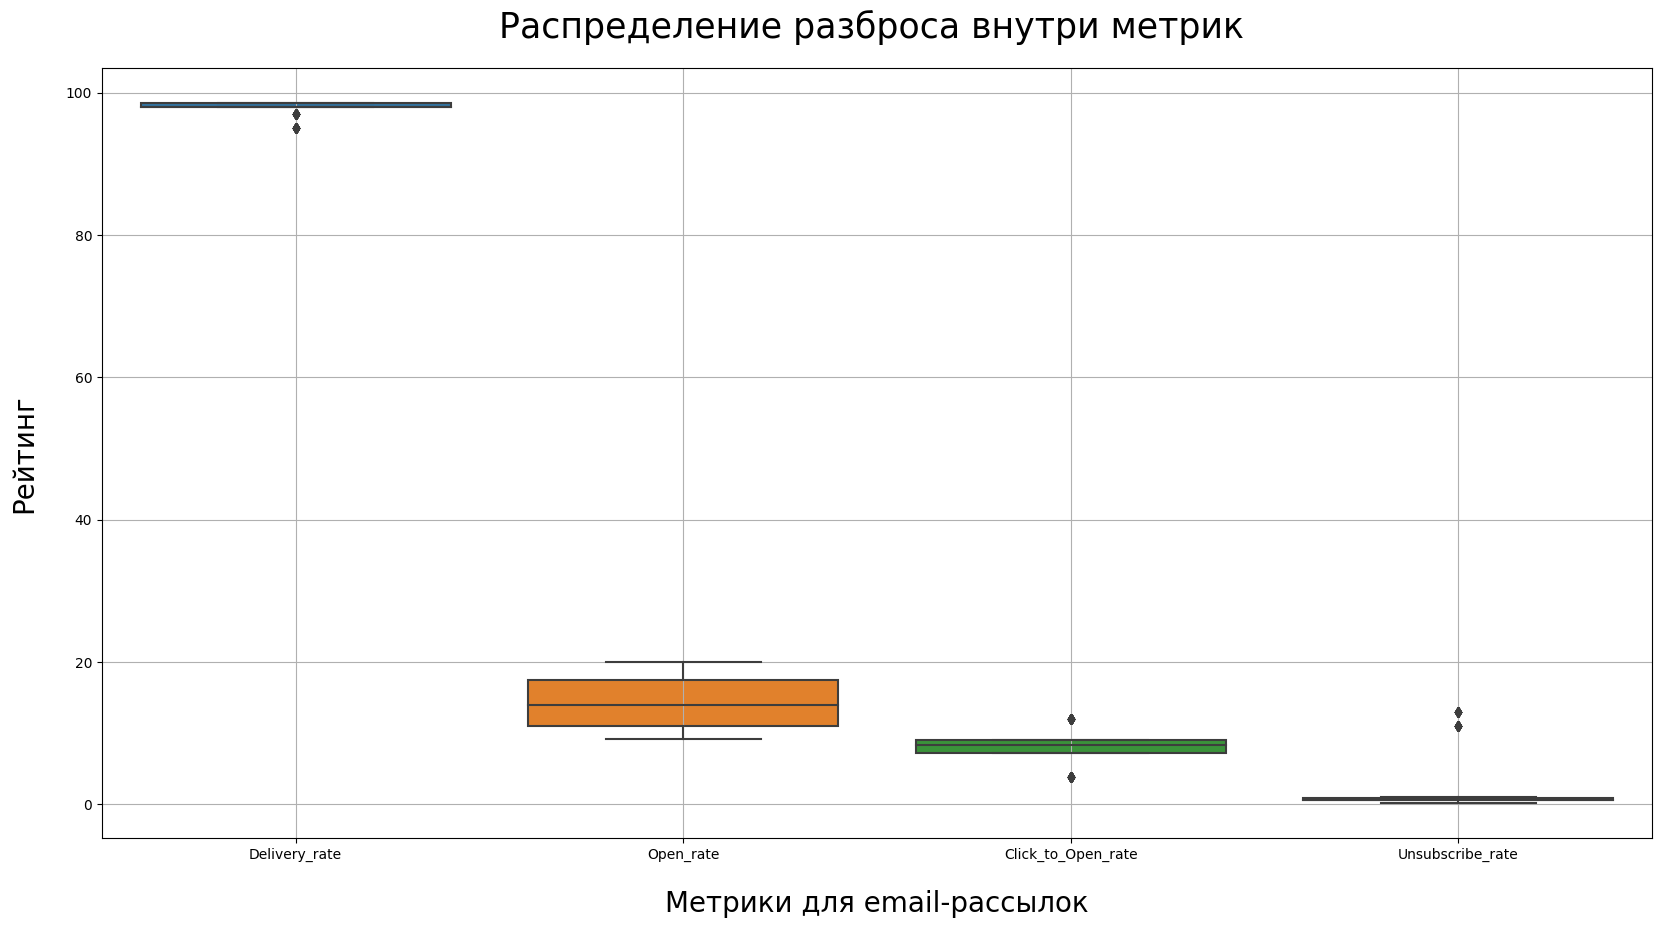

In [185]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=email_pivot[['Тема письма ', 'Delivery_rate', 'Open_rate', 'Click_to_Open_rate', 'Unsubscribe_rate']])

plt.title("Распределение разброса внутри метрик ", fontsize=25, pad=22)
plt.xlabel('Метрики для email-рассылок', fontsize=20, labelpad=20)
plt.ylabel('Рейтинг', fontsize=20, labelpad=20);
plt.grid(True)

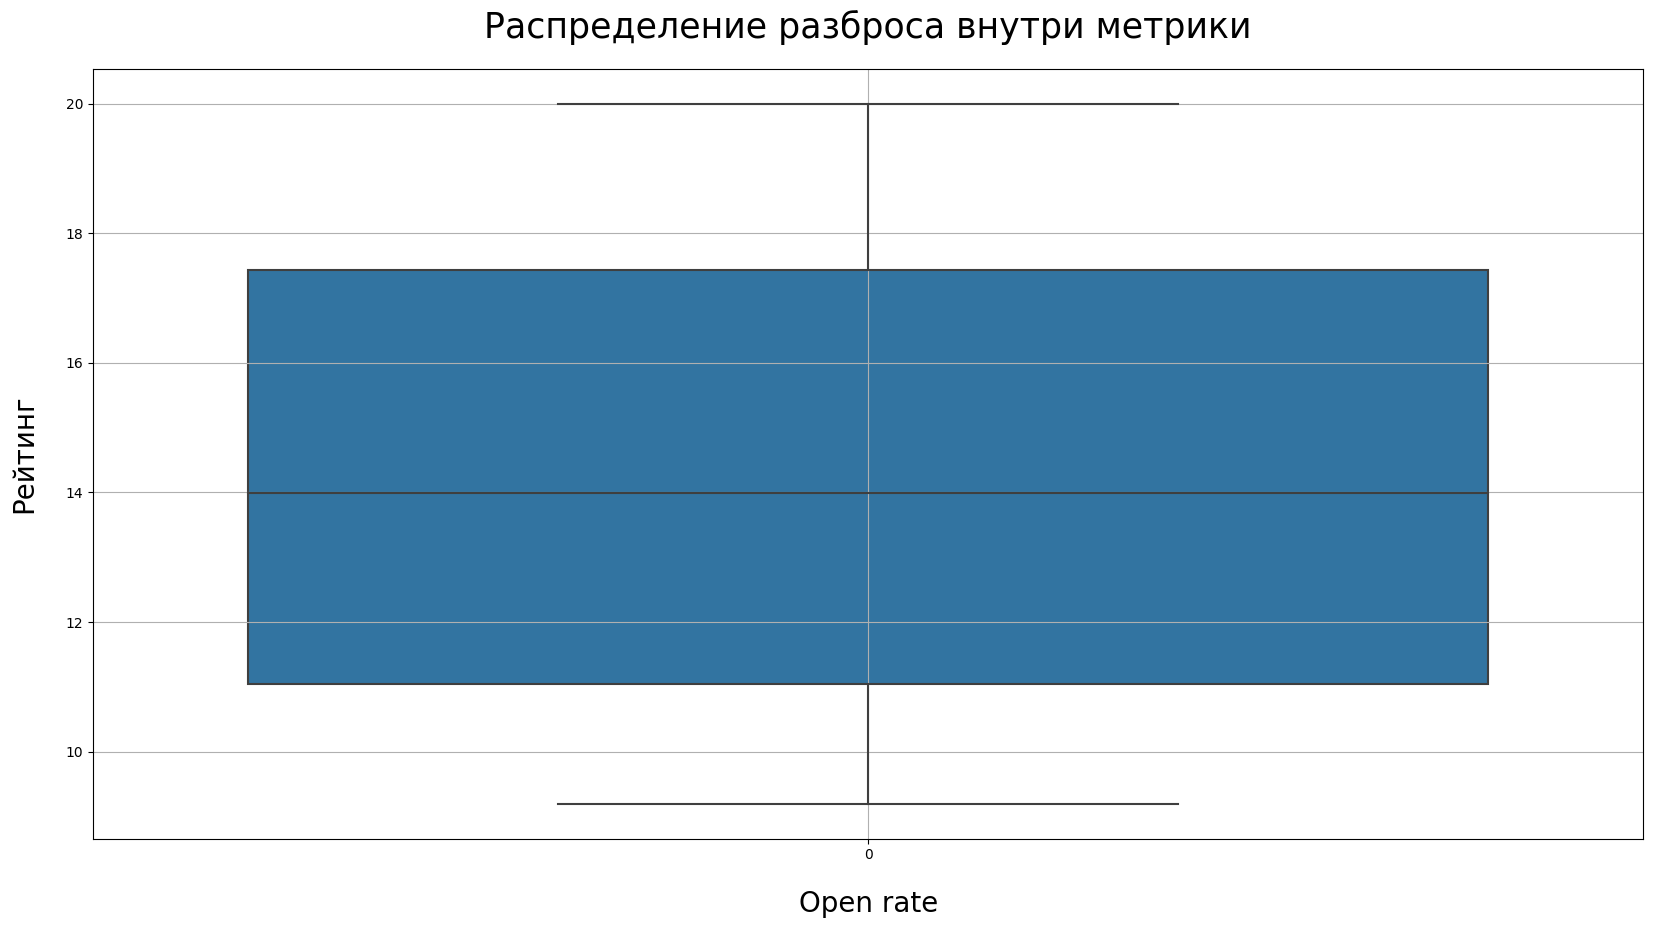

In [193]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=email_pivot['Open_rate'])

plt.title("Распределение разброса внутри метрики", fontsize=25, pad=22)
plt.xlabel('Open rate', fontsize=20, labelpad=20)
plt.ylabel('Рейтинг', fontsize=20, labelpad=20);
plt.grid(True)

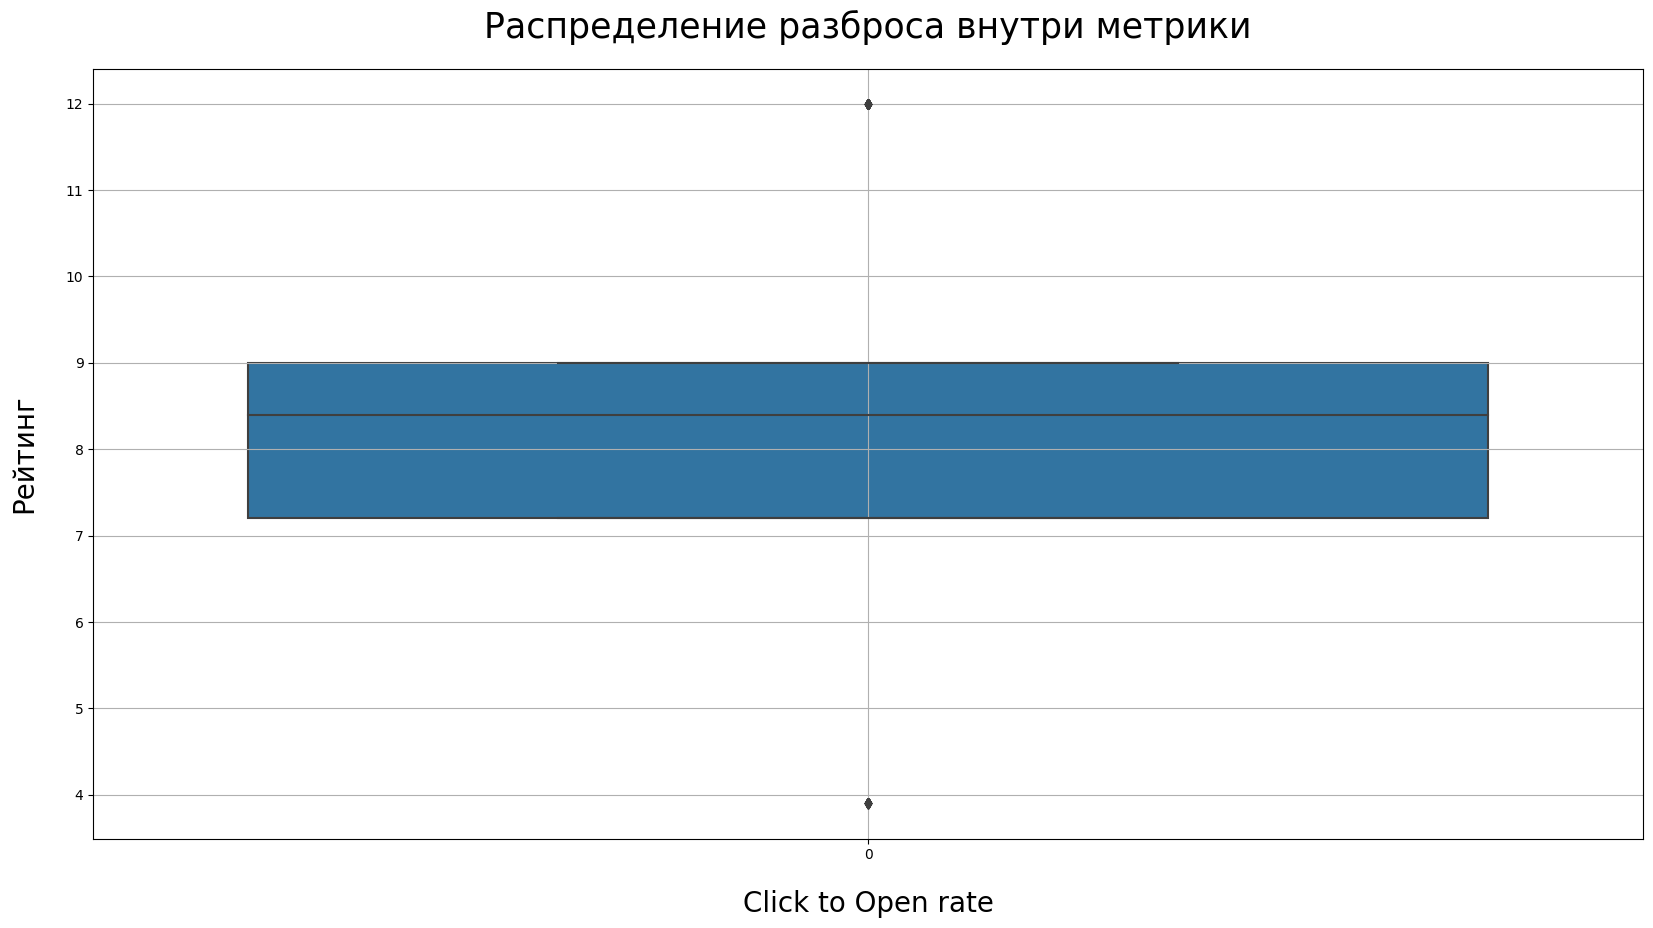

In [198]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=email_pivot['Click_to_Open_rate'])

plt.title("Распределение разброса внутри метрики", fontsize=25, pad=22)
plt.xlabel('Click to Open rate', fontsize=20, labelpad=20)
plt.ylabel('Рейтинг', fontsize=20, labelpad=20);
plt.grid(True)

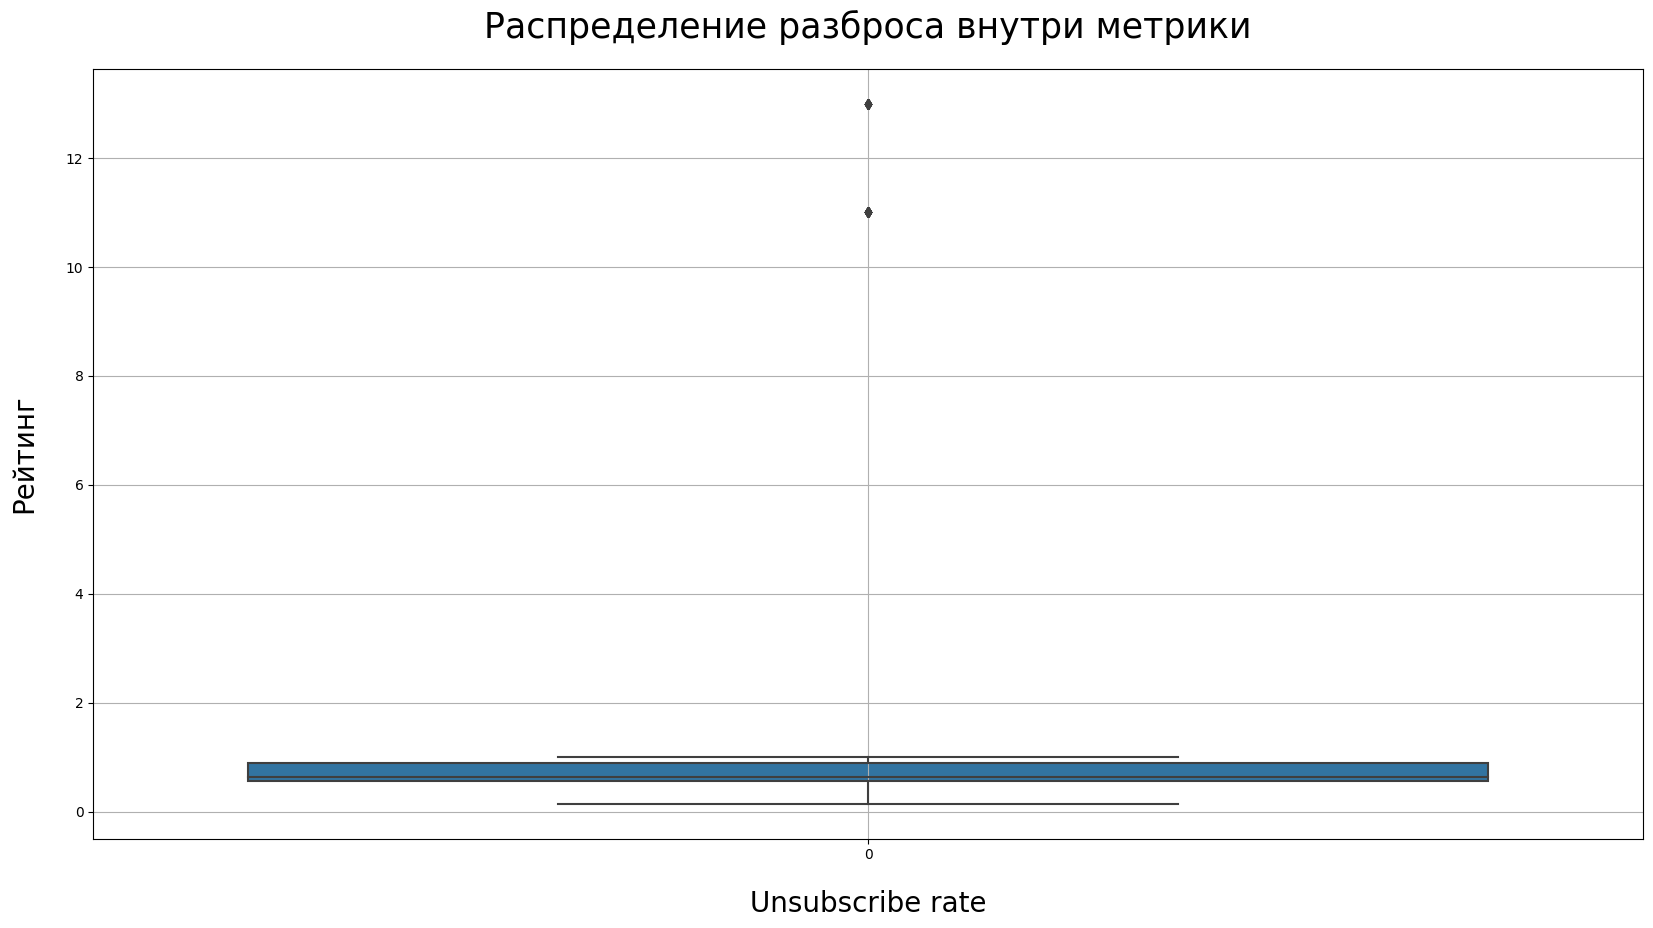

In [199]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=email_pivot['Unsubscribe_rate'])

plt.title("Распределение разброса внутри метрики", fontsize=25, pad=22)
plt.xlabel('Unsubscribe rate', fontsize=20, labelpad=20)
plt.ylabel('Рейтинг', fontsize=20, labelpad=20);
plt.grid(True)

In [196]:
email_pivot[['Тема письма ', 'Delivery_rate', 'Open_rate', 'Click_to_Open_rate', 'Unsubscribe_rate']].describe()

,Delivery_rate,Open_rate,Click_to_Open_rate,Unsubscribe_rate
count,218.000000,218.000000,218.000000,218.000000
mean,97.646791,13.763764,8.123433,2.470134
std,1.081472,3.391906,2.630963,4.173633
min,94.999945,9.199971,3.899182,0.149942
25%,97.999946,11.049988,7.199915,0.569994
50%,97.999997,13.990011,8.400036,0.630006
75%,98.499947,17.430002,9.000221,0.900010
max,98.500077,20.000000,12.000624,13.000037


На основе визуального и числового анализа распределения метрик определим топ самых выдающихся тем.

In [192]:
best_e = email_pivot.query(' 17 < Open_rate')
best_e = best_e.query(' 12.000007 < Click_to_Open_rate')
best_e = best_e.query(' 1 > Unsubscribe_rate')
best_e

,Тема письма,Доставлено,Клики,Открытия,Отписки,Отправлено,Delivery_rate,Open_rate,Click_to_Open_rate,Unsubscribe_rate
50,Тема письма 144,2259645,47263,393856,13332,2305760,98.000009,17.429995,12.000071,0.590004
55,Тема письма 149,612483,13230,110247,3614,624983,97.999946,18.000010,12.000327,0.590057
95,Тема письма 185,1145564,23961,199672,6759,1168943,97.999988,17.430017,12.000180,0.590015
105,Тема письма 194,1615301,33786,281547,5492,1639899,98.500030,17.430002,12.000128,0.339999
110,Тема письма 199,1325723,27729,231074,4507,1352779,97.999969,17.430036,12.000052,0.339965
185,Тема письма 7,1867036,39051,325424,16803,1905139,97.999988,17.429980,12.000037,0.899983
200,Тема письма 83,758118,15857,132140,6823,773590,97.999974,17.430004,12.000151,0.899992


## Вывод: 


Как видно из финальной выборки, темы не отличаются по `Delivery_rate` (нецелевой признак) и `Click_to_Open_rate`.

Поэтому для определения победителя сосредоточимся на других метриках:
- по рейтингу отписок лидируют темы **199** и **194**, за ними идут **185**, **149** и **144**; остальные заметно отстают при прочих равных – их можно уверенно исключить из рассмотрения;
- по рейтингу открытий явно лидирует тема **149**, однако она существенно уступает по массовости рассылки темам **199** и **194**.

Здесь важно определить, какой критерий считаем более весомым (целевым). Возможно, тема **149** более узкая и точечная по содержанию, поэтому получатели открывали её охотнее. Темы **199** и **194** при кратно большей массовости потеряли всего около 0,5% в открываемости и при этом сохранили наибольшую часть аудитории.

Абсолютные потери:
- **149** – 367 489
- **199** – 450 745
- **194** – 549 202

По итогам детального анализа: лучшей можно считать тему **194** – оптимальное сочетание минимальных потерь и высокого уровня открытий при большой массовости рассылки.